<a href="https://colab.research.google.com/github/aayushkubb/Deep_Learning_Tutorial/blob/master/DOGS_vs_CATS_DNN_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIM:
To create a notebook/template to read the data from a folder and create 

classifiers based on that.


## DATA
https://drive.google.com/drive/folders/1Mi36m4F0rqS9J9HL74rRA6nGMz7Yi0hh?usp=sharing


In [1]:
dataset_path='/content/drive/MyDrive/DL Colab Changes/Convolutional_Neural_Networks 3/dataset/'

In [3]:
!ls -ltr "/content/drive/MyDrive/DL Colab Changes/Convolutional_Neural_Networks 3/dataset"

total 23
-rw------- 1 root root 10244 Nov 18  2019 _DS_Store
drwx------ 2 root root  4096 May 22 16:12 test_set
drwx------ 2 root root  4096 May 22 16:12 single_prediction
drwx------ 2 root root  4096 May 22 16:13 training_set


# Imports

In [20]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense

In [9]:
import cv2

In [13]:
img=cv2.imread("/content/drive/MyDrive/DL Colab Changes/Convolutional_Neural_Networks 3/dataset/test_set/cats/cat.4028.jpg")

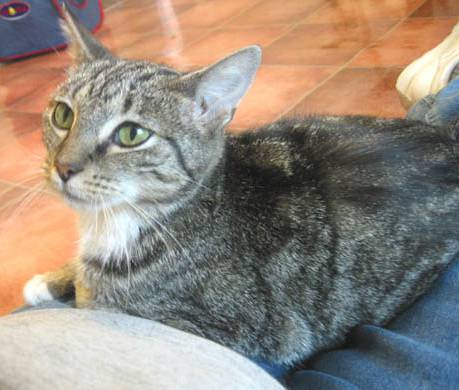

In [16]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

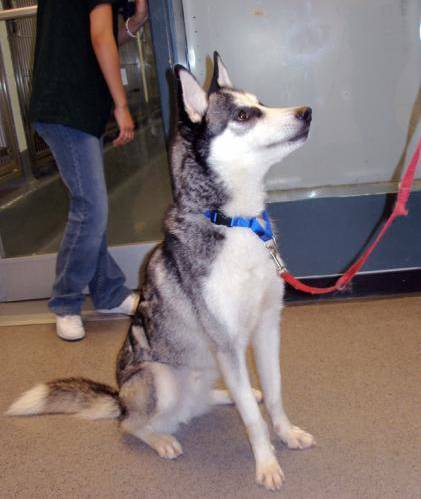

In [17]:
img=cv2.imread("/content/drive/MyDrive/DL Colab Changes/Convolutional_Neural_Networks 3/dataset/test_set/dogs/dog.4001.jpg")
cv2_imshow(img)

In [7]:
train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [18]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/DL Colab Changes/Convolutional_Neural_Networks 3/dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/DL Colab Changes/Convolutional_Neural_Networks 3/dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8048 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [21]:
from keras.datasets import cifar10
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten, MaxPool2D


In [26]:
import tensorflow as tf
model= tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
# model.add(Dense(10, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 16)        2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)              

In [27]:
len(train_generator), len(validation_generator)

(252, 63)

In [32]:

history=model.fit(
        train_generator,
        steps_per_epoch=20,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=2)

Epoch 1/5
20/20 [==============================] - 155s 8s/step - loss: 0.0000e+00 - accuracy: 0.4734 - val_loss: 0.0000e+00 - val_accuracy: 0.4375
Epoch 2/5
20/20 [==============================] - 139s 7s/step - loss: 0.0000e+00 - accuracy: 0.4859 - val_loss: 0.0000e+00 - val_accuracy: 0.5625
Epoch 3/5
20/20 [==============================] - 135s 7s/step - loss: 0.0000e+00 - accuracy: 0.4938 - val_loss: 0.0000e+00 - val_accuracy: 0.4375
Epoch 4/5
20/20 [==============================] - 122s 6s/step - loss: 0.0000e+00 - accuracy: 0.5188 - val_loss: 0.0000e+00 - val_accuracy: 0.4688
Epoch 5/5
20/20 [==============================] - 109s 6s/step - loss: 0.0000e+00 - accuracy: 0.5234 - val_loss: 0.0000e+00 - val_accuracy: 0.5625


# TRY Transfer Learning on this dataset

In [33]:
from keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.layers import GlobalAveragePooling2D, Dropout

In [34]:
# RESNET as the base model
base_model=tf.keras.applications.ResNet50(weights='imagenet',include_top=False)

# We will only use resnet for feature extarction, freeze all the layers that we dont need
for layer in base_model.layers:
  layer.trainable=False

# Take the output output of the base layers
base_model_output=base_model.output

# Add our layers
## Pooling
x=GlobalAveragePooling2D()(base_model_output)
## FC
x=Dense(2056,activation='relu')(x)
## Dropout
x=Dropout(0.5)(x)
## Output layer
x=Dense(1,activation='sigmoid')(x)

94781440/94765736 [==============================] - 1s 0us/step


In [35]:
resnet_model=Model(inputs=base_model.input,outputs=x)

In [36]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
resnet_model_history=resnet_model.fit( train_generator,
        steps_per_epoch=20,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=2)

Epoch 1/5
20/20 [==============================] - 107s 5s/step - loss: 0.0000e+00 - accuracy: 0.5109 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/5
20/20 [==============================] - 97s 5s/step - loss: 0.0000e+00 - accuracy: 0.5156 - val_loss: 0.0000e+00 - val_accuracy: 0.4844
Epoch 3/5
20/20 [==============================] - 87s 4s/step - loss: 0.0000e+00 - accuracy: 0.5250 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 4/5
20/20 [==============================] - 84s 4s/step - loss: 0.0000e+00 - accuracy: 0.5172 - val_loss: 0.0000e+00 - val_accuracy: 0.4531
Epoch 5/5
20/20 [==============================] - 74s 4s/step - loss: 0.0000e+00 - accuracy: 0.5188 - val_loss: 0.0000e+00 - val_accuracy: 0.5781
